# Package Installation and import 📥
Here, we will install and import necessary packages for our code. 
These contain extra functions that we will need to make our program work

In [1]:
import os
HOME = os.getcwd() # Get the current working directory
import ultralytics
from ultralytics import YOLO # Import YOLO class. This class is used to create a YOLOv8 model
from IPython.display import display, Image
from roboflow import Roboflow
import torch
from tqdm import tqdm

/opt/miniconda3/envs/detectionworkshop/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
HOME

'/Users/pattphurtivilai/CV_WorkShop'

_______________________________________________________________________________________________

# Loading the dataset 🌐
We will first create the place where we will store the dataset.
Then, we will import a pre-existing dataset from the web using *Roboflow*. You can later try to use a different dataset by going onto https://universe.roboflow.com/ and finding another dataset. Then, change the **datasetname** variable


In [3]:
#create the directory for the datasets:
datasets_dir = os.path.join(HOME, "datasets_yolo")
os.makedirs(datasets_dir, exist_ok=True)
os.chdir(datasets_dir)

# Download the dataset from Roboflow
datasetname = "dog_cat-test"
rf = Roboflow(api_key="f5pOg5frjQ3XAImBbLxX")
project = rf.workspace("ravensburgweingarten").project(datasetname)
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dog_Cat-Test-1 in yolov8:: 100%|██████████| 776/776 [00:00<00:00, 6788.78it/s]


## Fix data.yaml Don't forget to save!!! 🛠️
We need to manually fix this file because the dataset is intended to be used in a different environment.

1. in datasets/Dog_Cat-Test-1 <br>
2. go to data.yaml <br>
3. change 2 parameter as follow: <br>
     train: train/images <br>
     val: valid/images <br>

# The Dataset 🌐
Get acquainted with your dataset. Let us try looking at one element from it:

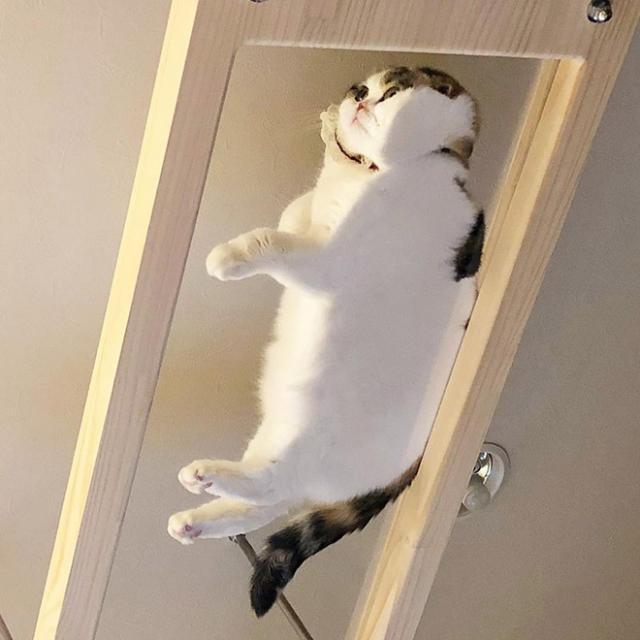

/Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/test/labels/0366-6B-WeK_fT8M_jpg.rf.c7b6cb31fa6fc3f788048c434d43b105.txt


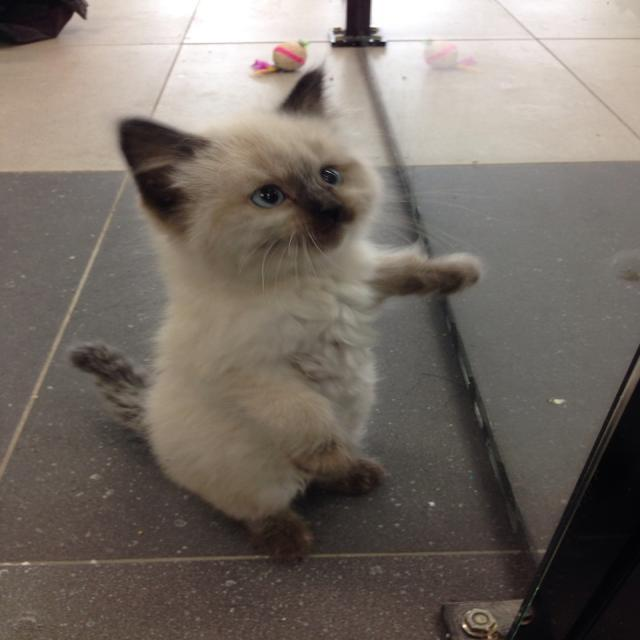

/Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/test/labels/3136-m4ojA8PCiSU_jpg.rf.94bbbd1f205393bd96edeb086ad9a936.txt


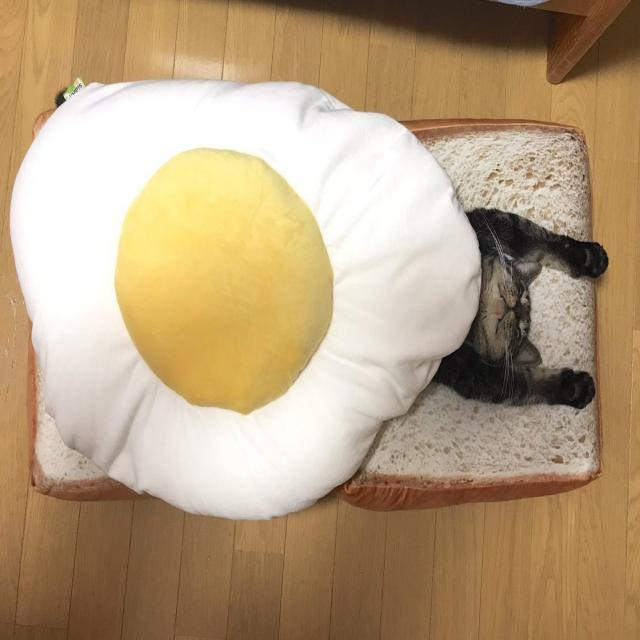

/Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/test/labels/S2IGnPjVCJs_jpg.rf.5b5c93288819429fe061491c755270ea.txt


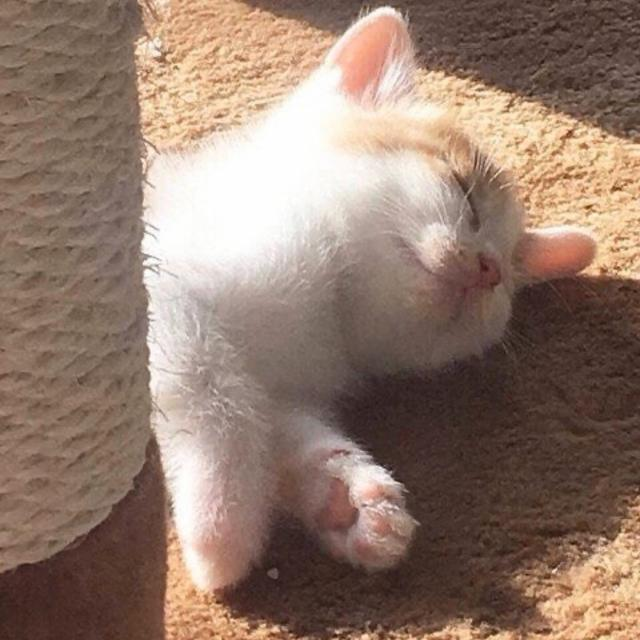

/Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/test/labels/1101-WMH1xzEznuY_jpg.rf.676977a5b57a822403c8972b53c18a78.txt


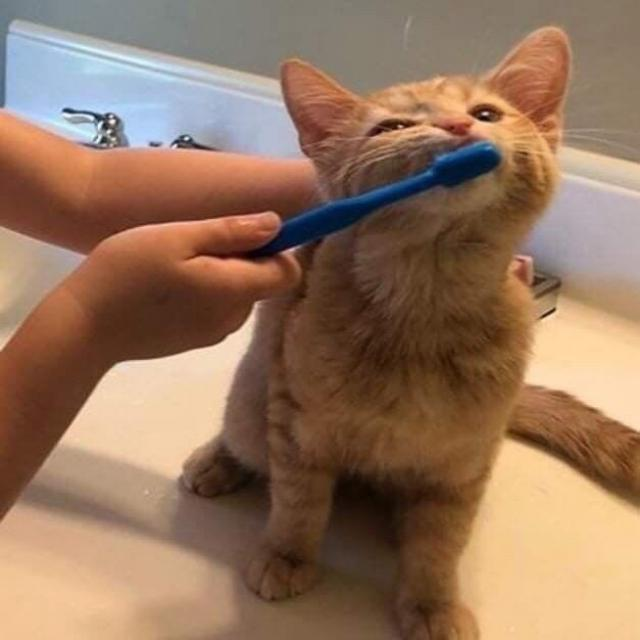

/Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/test/labels/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.txt


In [4]:
#get the first element from the dataset (code on computer)
sample = f"{HOME}/datasets_yolo/{datasetname}/test/images/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg"
#get the full address of elements in the dataset
datasetname = "Dog_Cat-Test-1"
images = [os.path.join(datasets_dir, datasetname, "test", "images", image) for image in os.listdir(os.path.join(datasets_dir, datasetname, "test", "images"))]
labels = [os.path.join(datasets_dir, datasetname, "test", "labels", label) for label in os.listdir(os.path.join(datasets_dir, datasetname, "test", "labels"))]
#display five random pictures alongside their labels
for i in range(5):
    display(Image(filename=images[i]))
    print(labels[i])


_______________________________________________________________________________________________

# Training the model 👨‍🏫
We will now simply feed the dataset to YOLO so that it learns how to recognise elements from it. 

In [5]:
%cd {HOME}
output = f"{HOME}/runs/detect"
data_path= f"{dataset.location}/data.yaml"
model = YOLO("yolov8n.yaml")
results = model.train(data= data_path, epochs= 3, imgsz=160, plots=True, project= output)  # Set custom project directory)

This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


/Users/pattphurtivilai/CV_WorkShop
New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.27 🚀 Python-3.12.9 torch-2.2.1 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=None, workers=8, project=/Users/pattphurtivilai/CV_WorkShop/runs/detect, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=F

train: Scanning /Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/train/labels... 321 images, 0 backgrounds, 0 corrupt: 100%|██████████| 321/321 [00:00<00:00, 2156.71it/s]

train: New cache created: /Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/train/labels.cache



val: Scanning /Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/valid/labels... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 1454.96it/s]

val: New cache created: /Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/valid/labels.cache


Plotting labels to /Users/pattphurtivilai/CV_WorkShop/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 0 dataloader workers
Logging results to /Users/pattphurtivilai/CV_WorkShop/runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      4.378      3.611      4.194          4        160: 100%|██████████| 21/21 [00:25<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         43         50     0.0216       0.54       0.11     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      4.264      3.391      4.099          1        160: 100%|██████████| 21/21 [00:24<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         43         50    0.00644       0.74      0.121       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      4.199      2.985      3.967          3        160: 100%|██████████| 21/21 [00:23<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         43         50    0.00647       0.76      0.105     0.0384



3 epochs completed in 0.022 hours.
Optimizer stripped from /Users/pattphurtivilai/CV_WorkShop/runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from /Users/pattphurtivilai/CV_WorkShop/runs/detect/train/weights/best.pt, 6.2MB

Validating /Users/pattphurtivilai/CV_WorkShop/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.12.9 torch-2.2.1 CPU (Apple M2)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


                   all         43         50     0.0221       0.56      0.111     0.0392
Speed: 0.1ms preprocess, 22.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /Users/pattphurtivilai/CV_WorkShop/runs/detect/train


_______________________________________________________________________________________________

# Model Evaluation 📊
When we are analysing how well YOLO is at predicting the contents of an image, there are several metrics we can use.
The most important ones are the **training loss** and the **validation loss**. The lower these values are, the better your algorithm is at predicting data. 

/Users/pattphurtivilai/CV_WorkShop


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


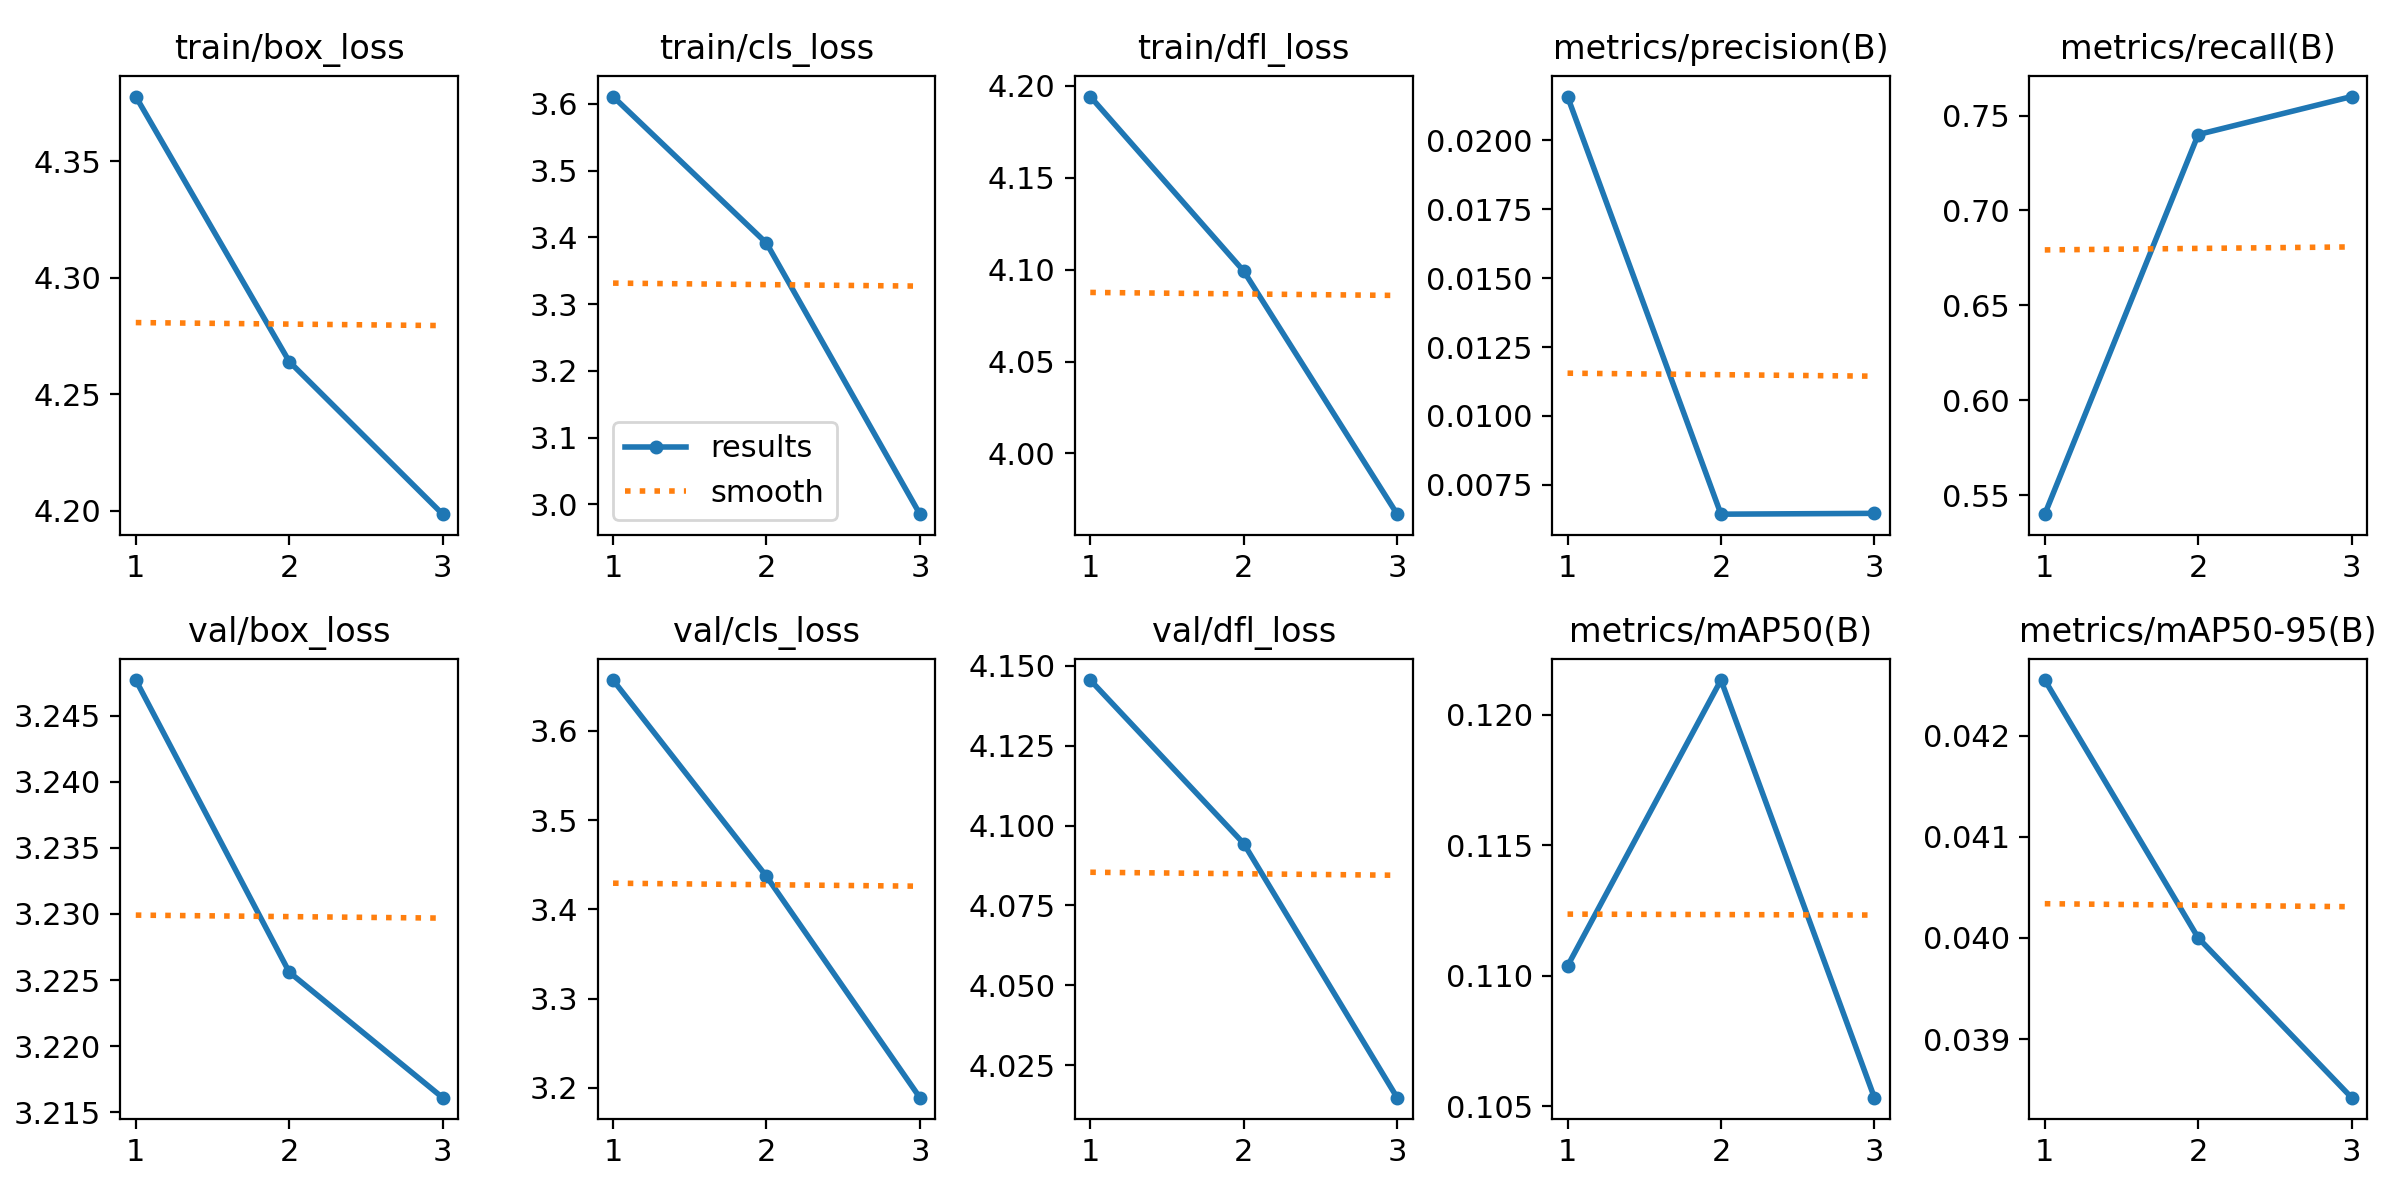

In [6]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# Furthermore, here is the F-1 Curve 📈
The F-1 curve tells us the overall performance of our model. It is particularly insightful because it **accounts for underrepresented classes**.
Imagine you have a thousand pictures of dogs and five of cats. You might have high accuracy if you always output dogs, but your F1 score will reflect this issue. 

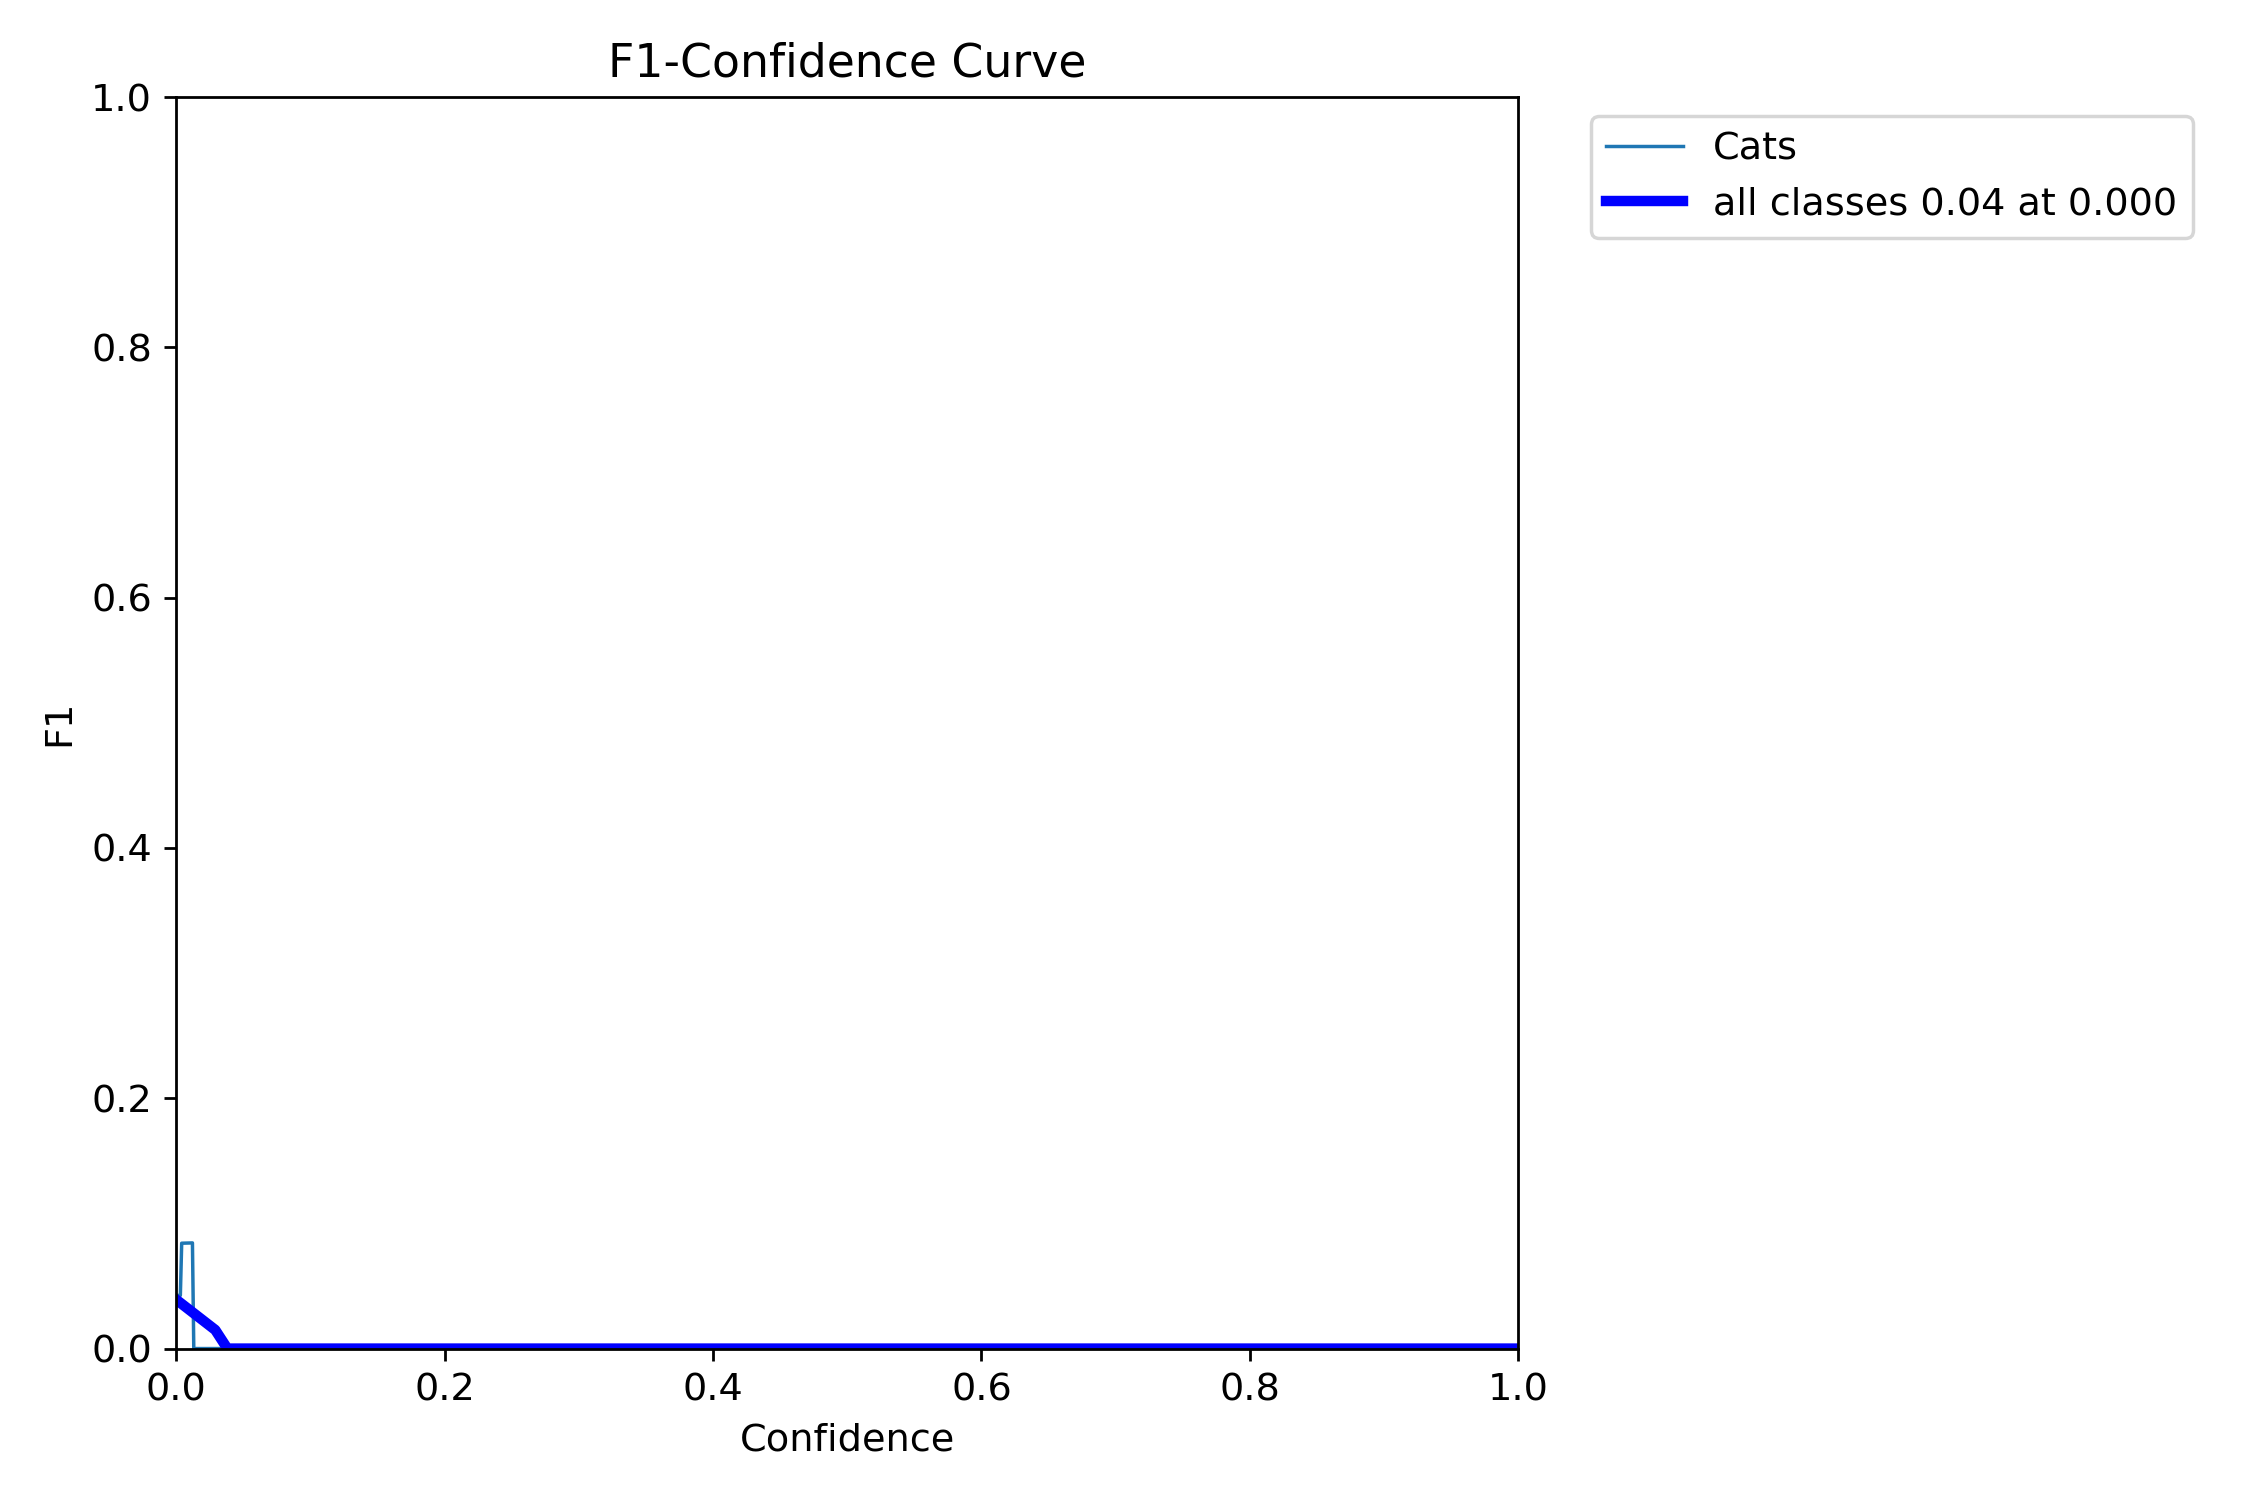

In [7]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

_______________________________________________________________________________________________

## Testing the model ✍️
Previously, the model only saw pictures in the **train** folder. Now, we will show it the pictures in the **test** folder, pictures the model has never seen before. Based on how good the model's performance is with the test images, we can have an idea of what the model's performance with data in the real world will be.

## Here is the image we want to test 😽

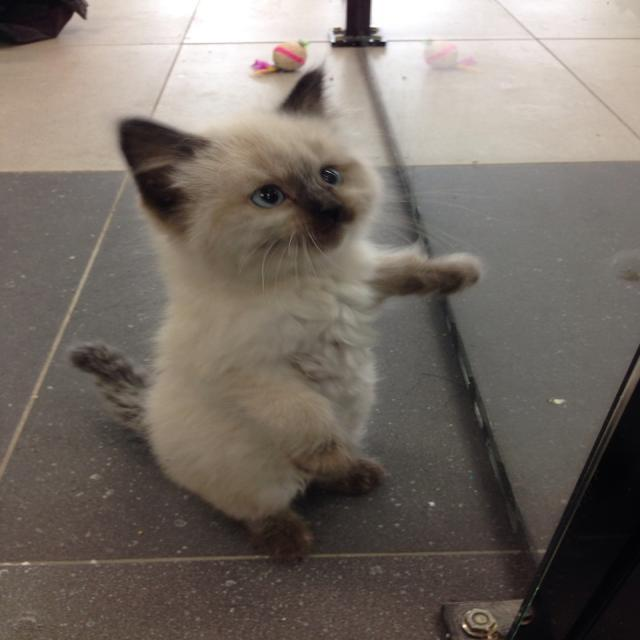

In [8]:
test1 =  f"{HOME}/datasets_yolo/Dog_Cat-Test-1/test/images/0262-jo9XwI6B8Rs_jpg.rf.7fb55bdcd52d24ffd635e25d8aa7e4ea.jpg"
Image(test1)

## Test pretrain model 📝
this is the model provided by Yolo (already train by the company)

In [9]:
# Load a pretrained YOLOv8n model
%cd {HOME}
pretrainmodel = YOLO('yolov8n.pt')

# Run inference on an image
results_1 = pretrainmodel(test1)  # list of 1 Results object
for result in results_1:
    result.show()  # display to screen

/Users/pattphurtivilai/CV_WorkShop

image 1/1 /Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/test/images/0262-jo9XwI6B8Rs_jpg.rf.7fb55bdcd52d24ffd635e25d8aa7e4ea.jpg: 640x640 1 cat, 121.7ms
Speed: 3.2ms preprocess, 121.7ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


## Test our model 📝

In [10]:
# Load a model
%cd {HOME}
model_path=f"{HOME}/runs/detect/train/weights/best.pt"

ourmodel = YOLO(model_path)  # pretrained YOLOv8n model

# Run batched inference on a list of images
results_2 = ourmodel(test1)  # list of 1 Results object

# Process results list
for result in results_2:
    result.show()  # display to screen
   

This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


/Users/pattphurtivilai/CV_WorkShop

image 1/1 /Users/pattphurtivilai/CV_WorkShop/datasets_yolo/Dog_Cat-Test-1/test/images/0262-jo9XwI6B8Rs_jpg.rf.7fb55bdcd52d24ffd635e25d8aa7e4ea.jpg: 160x160 (no detections), 10.8ms
Speed: 0.7ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 160, 160)


## Can yolo detect everything? let's find out 🕵🏾

Here we want to detect spanner

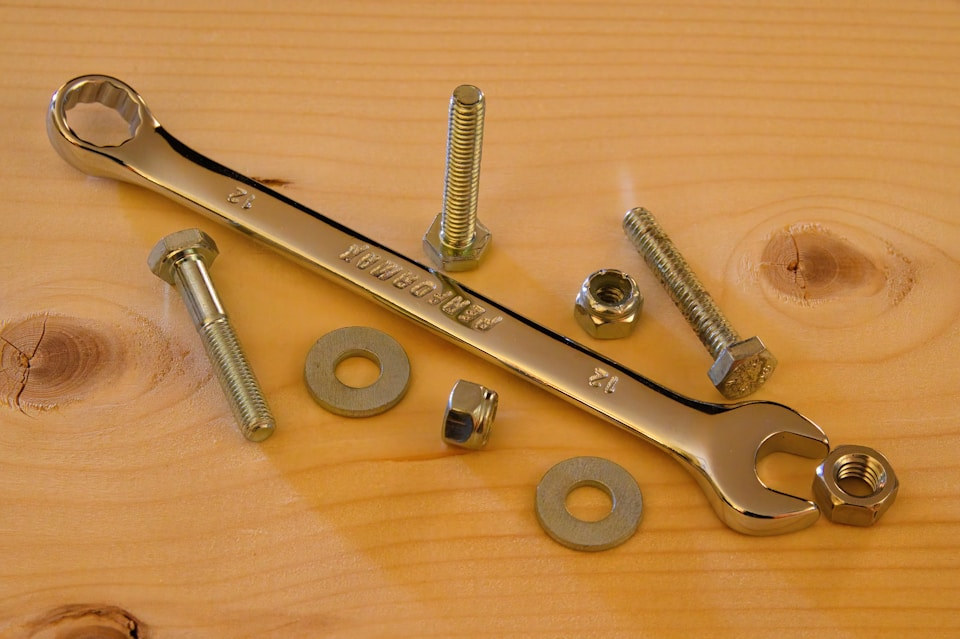

In [11]:
testimage = f"{HOME}/datasets_GD/hardware.jpg"
Image(testimage)

Can it detect??

In [12]:
results_3 = pretrainmodel(testimage)  # list of 1 Results object
for result in results_3:
    result.show()  # display to screen


image 1/1 /Users/pattphurtivilai/CV_WorkShop/datasets_GD/hardware.jpg: 448x640 (no detections), 108.2ms
Speed: 28.9ms preprocess, 108.2ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


## YOLO cannot detect Spanner, WHY!!!! 😲

## Yolo is called 'Closed Set Object Detection', which has limitation on detection.<br>

This is all the objects that YOLO can detect <br>

In [13]:
pretrainmodel.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

## So, how can we detect spanner??!! 🤔

## Let's find out in this workshop